In [1]:
import math
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import scipy.stats as scs
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

/Users/CEO/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def clean_df(df):
    '''
    Take in raw dataframe and clean up to ready for modelling
    '''
    pass

# Dataset For Europe's Top 5 leagues (2012/13, 13/14, 14/15, 15/16, 16/17)
### England, Germany, France, Spain, Italy -->  'EPL', 'Bundesliga', 'Ligue_1', 'La_Liga', 'Serie_A'

In [3]:
df = pd.read_csv('data/FootballEurope/FootballEurope.csv')

/Users/CEO/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (39,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Unnamed: 0,id,homeTacklesTotalHT,homeShotsTotalHT,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,awayDribblesAttemptedHT,awayTeamLineUp,awayShotsBlockedHT,awayShotsTotalHT,homeDribbleSuccessHT,homeFoulsCommitedFT,homeAerialsTotalFT,homeRatingsHT,awayShotsOnTargetFT,awayShotsBlockedFT,homeInterceptionsHT,awayPossessionHT,homePassesKeyFT,awayShotsOnTargetHT,awayDribblesWonFT,awayTackleSuccessHT,homeCornersTotalFT,homeAerialsTotalHT,homeShotsBlockedFT,awayCornersTotalHT,homeCornersTotalHT,homeDribbleSuccessFT,homeTeamLineUp,awayPassSuccessHT,awayDribblesWonHT,homeDispossessedHT,awayAerialsTotalFT,homeShotsBlockedHT,awayPassesKeyFT,homeTackleSuccessHT,awayPassesKeyHT,homeFormation,awayInterceptionsHT,awayDispossessedHT,refereeName,homeDribblesWonHT,homePossessionFT,awayAerialsTotalHT,awayGoalHT,awayManagerName,awayInterceptionsFT,homeDribbledPastFT,homeGoalHT,awayDribbleSuccessHT,homeGoalFT,awayTacklesTotalHT,homeDribblesWonFT,awayTackleSuccessFT,awayTeam,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,homeShotsOnTargetHT,awayFormation,awayOffsidesCaughtHT,homeDribbledPastHT,awayFoulsCommitedHT,homeShotsTotalFT,homePassSuccessFT,homeFoulsCommitedHT,awayCornersTotalFT,homeTeam,homeManagerName,awayFoulsCommitedFT,homeShotsOnTargetFT,homeDribblesAttemptedHT,awayRatingsHT,homeOffsidesCaughtHT,homeTacklesTotalFT,awayDribbledPastHT,awayGoalFT,homePassesKeyHT,homeOffsidesCaughtFT,homePossessionHT,venueName,awayDribblesAttemptedFT,homeInterceptionsFT,homePassSuccessHT,date,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,division
0,1,1,18,10,14.0,73.69,6.38,47.22,12,"Joel Robles,Paul Scharner,Antolin Alcaraz,Emme...",3.0,5.0,25.00,12,22,6.39,2.0,4.0,12,51.26,14,1.0,10.0,87.50,7.0,16,4.0,0.0,4.0,38.89,"Wojciech Szczesny,Bacary Sagna,Laurent Kosciel...",72.18,7.0,5,22,4.0,9.0,60.71,3.0,4231,20,6.0,Mike Dean,1.0,47.65,16,1,Roberto Martinez,34,10.0,1,59.09,4,10,5.0,75.00,Wigan,6,5.0,5.0,1.0,343,1.0,7.0,7,21,66.73,5,4.0,Arsenal,Arsène Wenger,11,10.0,5.0,6.21,1.0,34,1.0,1,7,2.0,48.74,Emirates Stadium,20,21,69.45,2013-05-14,18,6.73,12.0,75.00,52.35,11.0,EPL
1,2,2,13,3,11.0,75.78,6.39,27.27,5,"Petr Cech,César Azpilicueta,Branislav Ivanovic...",1.0,4.0,50.00,12,15,6.24,5.0,4.0,9,51.19,7,2.0,3.0,75.00,8.0,9,4.0,3.0,4.0,31.82,"Gerhard Tremmel,Angel Rangel,Garry Monk,Ashley...",83.18,2.0,4,15,1.0,6.0,86.36,1.0,4231,5,8.0,Kevin Friend,2.0,53.71,9,0,Roberto Di Matteo,11,3.0,0,40.00,1,9,4.0,86.96,Chelsea,13,2.0,4.0,0.0,4231,0.0,2.0,4,10,80.95,7,6.0,Swansea,Michael Laudrup,10,2.0,5.0,6.18,1.0,22,2.0,1,3,3.0,48.81,Liberty Stadium,11,14,78.64,2012-11-03,26,6.37,13.0,88.89,46.29,11.0,EPL
2,3,3,10,5,16.0,74.86,6.73,66.67,4,"Anders Lindegaard,Antonio Valencia,Phil Jones,...",3.0,8.0,50.00,12,19,5.80,6.0,5.0,3,65.24,16,3.0,6.0,77.78,3.0,9,6.0,2.0,0.0,45.00,"Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",84.24,3.0,5,19,2.0,11.0,68.75,6.0,4231,5,6.0,Michael Oliver,2.0,39.82,9,3,Alex Ferguson,15,6.0,1,75.00,5,9,5.0,73.53,Man Utd,9,2.0,5.0,1.0,4231,2.0,3.0,3,19,69.70,5,5.0,West Brom,Steve Clarke,8,6.0,4.0,6.53,2.0,25,2.0,5,5,4.0,34.76,The Hawthorns,9,5,75.31,2013-05-19,20,6.04,11.0,75.00,60.18,15.0,EPL
3,4,4,8,5,6.0,78.43,6.41,27.78,4,"Michel Vorm,Angel Rangel,Garry Monk,Ashley Wil...",2.0,7.0,58.33,11,36,6.15,2.0,3.0,10,52.49,10,1.0,5.0,61.11,3.0,17,3.0,1.0,1.0,63.33,"Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",79.78,0.0,3,36,1.0,8.0,100.00,4.0,4231,12,4.0,Lee Mason,3.0,45.98,17,1,Michael Laudrup,24,5.0,1,0.00,2,9,8.0,63.54,Swansea,9,4.0,8.0,2.0,4231,1.0,0.0,4,14,64.96,5,3.0,West Brom,Steve Clarke,10,5.0,6.0,6.26,1.0,24,3.0,1,5,1.0,47.51,The Hawthorns,18,23,67.21,2013-03-09,23,6.43,14.0,79.55,54.02,11.0,EPL
4,5,5,13,6,9.0,61.07,6.51,40.00,9,"Asmir Begovic,Geoff Cameron,Marc Wilson,Ryan S...",1.0,4.0,81.25,10,48,6.21,4.0,2.0,2,43.07,13,2.0,6.0,60.00,14.0,24,4.0,2.0,7.0,66.18,"Robert Elliot,Mathieu Debuchy,Mapou Yanga-Mbiw...",61.31,4.0,8,48,0.0,5.0,66.67,3

In [5]:
df[(df['awayManagerName'] == 'Josep Guardiola') | (df['homeManagerName'] == 'Josep Guardiola')][['date', 'homeGoalFT', 'awayGoalFT']].sort_values('date')

,date,homeGoalFT,awayGoalFT
2427,2013-08-09,3,1
2420,2013-08-17,0,1
2409,2013-08-24,2,0
2398,2013-08-27,1,1
2391,2013-09-14,2,0
2384,2013-09-21,0,4
2372,2013-09-28,1,0
2365,2013-10-05,1,1
2349,2013-10-19,4,1
2339,2013-10-26,3,2


In [6]:
df.date.min(), max(df.date)

('2012-08-10', '2017-05-28')

In [7]:
df.shape

(9127, 94)

In [8]:
df.describe()

,Unnamed: 0,id,homeTacklesTotalHT,homeShotsTotalHT,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,awayDribblesAttemptedHT,awayShotsBlockedHT,awayShotsTotalHT,homeDribbleSuccessHT,homeFoulsCommitedFT,homeAerialsTotalFT,homeRatingsHT,awayShotsOnTargetFT,awayShotsBlockedFT,homeInterceptionsHT,awayPossessionHT,homePassesKeyFT,awayShotsOnTargetHT,awayDribblesWonFT,awayTackleSuccessHT,homeCornersTotalFT,homeAerialsTotalHT,homeShotsBlockedFT,awayCornersTotalHT,homeCornersTotalHT,homeDribbleSuccessFT,awayPassSuccessHT,awayDribblesWonHT,homeDispossessedHT,awayAerialsTotalFT,homeShotsBlockedHT,awayPassesKeyFT,homeTackleSuccessHT,awayPassesKeyHT,awayInterceptionsHT,awayDispossessedHT,homeDribblesWonHT,homePossessionFT,awayAerialsTotalHT,awayGoalHT,awayInterceptionsFT,homeDribbledPastFT,homeGoalHT,awayDribbleSuccessHT,homeGoalFT,awayTacklesTotalHT,homeDribblesWonFT,awayTackleSuccessFT,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,homeShotsOnTargetHT,awayOffsidesCaughtHT,homeDribbledPastHT,awayFoulsCommitedHT,homeShotsTotalFT,homePassSuccessFT,homeFoulsCommitedHT,awayCornersTotalFT,awayFoulsCommitedFT,homeShotsOnTargetFT,homeDribblesAttemptedHT,awayRatingsHT,homeOffsidesCaughtHT,homeTacklesTotalFT,awayDribbledPastHT,awayGoalFT,homePassesKeyHT,homeOffsidesCaughtFT,homePossessionHT,awayDribblesAttemptedFT,homeInterceptionsFT,homePassSuccessHT,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT
count,9127.000000,9127.000000,9127.000000,9127.000000,9126.000000,9127.000000,9127.000000,9125.000000,9127.000000,8906.000000,9126.000000,9124.000000,9127.000000,9127.000000,9127.000000,9069.000000,8906.000000,9127.000000,9127.000000,9127.000000,9069.000000,9125.000000,9127.000000,9103.000000,9127.000000,9020.000000,9076.000000,9103.000000,9124.000000,9127.000000,9125.000000,9127.000000,9127.000000,9020.000000,9122.000000,9127.000000,9122.000000,9127.000000,9126.000000,9124.000000,9127.000000,9127.000000,9127.00000,9127.000000,9125.000000,9127.000000,9125.000000,9127.000000,9127.000000,9124.000000,9127.000000,9127.000000,8819.000000,9124.000000,9103.000000,8819.000000,9125.000000,9127.000000,9127.000000,9127.000000,9127.000000,9076.000000,9127.000000,9103.000000,9126.000000,9127.000000,8860.000000,9127.000000,9124.000000,9127.000000,9127.000000,8860.000000,9127.000000,9127.000000,9127.000000,9127.000000,9127.000000,9127.000000,9126.000000,9127.000000,9127.000000,9126.000000
mean,4564.000000,1235.387531,13.378328,6.384464,11.542735,66.551030,6.439506,51.522129,7.682809,1.205255,5.047776,51.747545,13.423688,35.085022,6.283558,3.927555,2.684258,8.194259,38.551101,10.374493,1.725549,8.817205,70.655982,5.725805,17.586940,3.313304,2.068422,2.681424,52.332969,66.647938,4.006137,5.657061,35.085242,1.519623,8.401118,72.280635,3.744025,8.385012,5.704032,4.373192,41.307317,17.586721,0.51123,16.524269,8.816767,0.692561,50.736609,1.554180,13.945875,9.479614,69.638657,11.426318,2.271346,9.479066,2.156981,1.121216,4.006247,6.602389,14.044045,69.012855,6.368467,4.486117,13.876082,4.886191,8.298378,6.244680,1.240519,28.222307,4.372972,1.172784,4.711844,2.515801,41.642178,16.700778,16.291553,69.755104,29.178810,6.513104,17.774381,71.066465,38.885950,11.294872
std,2634.882287,829.367312,4.873219,3.037856,4.596256,8.826947,0.214911,17.167074,3.887593,1.221407,2.668439,22.734890,4.330811,13.962922,0.158700,2.242898,1.939921,3.640613,20.824293,4.356334,1.404978,4.537354,14.716580,2.986485,7.562848,2.203340,1.626791,1.855708,16.521952,9.693429,2.603779,2.860413,13.963038,1.381114,3.781230,14.950003,2.231167,3.751471,2.851841,2.707209,21.793897,7.562372,0.72271,6.163884,4.537554,0.840262,23.808475,1.315918,4.969943,4.667072,11.167296,4.598428,1.753384,4.667516,1.594206,1.148402,2.603842,2.658025,5.258122,8.728028,2.652573,2.564458,4.384101,2.581225,4.010350,0.154442,1.196585,8.254193,2.707077,1.156811,2.509333,1.843057,22.231263,6.774650,6.065943,9.325749,8.365003,0.216431,6.94810

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9127 entries, 0 to 9126
Data columns (total 94 columns):
Unnamed: 0                 9127 non-null int64
id                         9127 non-null int64
homeTacklesTotalHT         9127 non-null int64
homeShotsTotalHT           9127 non-null int64
awayDispossessedFT         9126 non-null float64
awayPassSuccessFT          9127 non-null float64
awayRatingsFT              9127 non-null float64
awayDribbleSuccessFT       9125 non-null float64
awayDribblesAttemptedHT    9127 non-null int64
awayTeamLineUp             9127 non-null object
awayShotsBlockedHT         8906 non-null float64
awayShotsTotalHT           9126 non-null float64
homeDribbleSuccessHT       9124 non-null float64
homeFoulsCommitedFT        9127 non-null int64
homeAerialsTotalFT         9127 non-null int64
homeRatingsHT              9127 non-null float64
awayShotsOnTargetFT        9069 non-null float64
awayShotsBlockedFT         8906 non-null float64
homeInterceptionsHT       

In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'homeTacklesTotalHT', 'homeShotsTotalHT',
       'awayDispossessedFT', 'awayPassSuccessFT', 'awayRatingsFT',
       'awayDribbleSuccessFT', 'awayDribblesAttemptedHT', 'awayTeamLineUp',
       'awayShotsBlockedHT', 'awayShotsTotalHT', 'homeDribbleSuccessHT',
       'homeFoulsCommitedFT', 'homeAerialsTotalFT', 'homeRatingsHT',
       'awayShotsOnTargetFT', 'awayShotsBlockedFT', 'homeInterceptionsHT',
       'awayPossessionHT', 'homePassesKeyFT', 'awayShotsOnTargetHT',
       'awayDribblesWonFT', 'awayTackleSuccessHT', 'homeCornersTotalFT',
       'homeAerialsTotalHT', 'homeShotsBlockedFT', 'awayCornersTotalHT',
       'homeCornersTotalHT', 'homeDribbleSuccessFT', 'homeTeamLineUp',
       'awayPassSuccessHT', 'awayDribblesWonHT', 'homeDispossessedHT',
       'awayAerialsTotalFT', 'homeShotsBlockedHT', 'awayPassesKeyFT',
       'homeTackleSuccessHT', 'awayPassesKeyHT', 'homeFormation',
       'awayInterceptionsHT', 'awayDispossessedHT', 'refereeName',
       'hom

In [11]:
HT_cols = [col for col in df.columns if 'HT' in col]
print(sorted(HT_cols), len(HT_cols))

['awayAerialsTotalHT', 'awayCornersTotalHT', 'awayDispossessedHT', 'awayDribbleSuccessHT', 'awayDribbledPastHT', 'awayDribblesAttemptedHT', 'awayDribblesWonHT', 'awayFoulsCommitedHT', 'awayGoalHT', 'awayInterceptionsHT', 'awayOffsidesCaughtHT', 'awayPassSuccessHT', 'awayPassesKeyHT', 'awayPossessionHT', 'awayRatingsHT', 'awayShotsBlockedHT', 'awayShotsOnTargetHT', 'awayShotsTotalHT', 'awayTackleSuccessHT', 'awayTacklesTotalHT', 'homeAerialsTotalHT', 'homeCornersTotalHT', 'homeDispossessedHT', 'homeDribbleSuccessHT', 'homeDribbledPastHT', 'homeDribblesAttemptedHT', 'homeDribblesWonHT', 'homeFoulsCommitedHT', 'homeGoalHT', 'homeInterceptionsHT', 'homeOffsidesCaughtHT', 'homePassSuccessHT', 'homePassesKeyHT', 'homePossessionHT', 'homeRatingsHT', 'homeShotsBlockedHT', 'homeShotsOnTargetHT', 'homeShotsTotalHT', 'homeTackleSuccessHT', 'homeTacklesTotalHT'] 40


In [12]:
FT_cols = [col for col in df.columns if 'FT' in col]
print(sorted(FT_cols), len(FT_cols))

['awayAerialsTotalFT', 'awayCornersTotalFT', 'awayDispossessedFT', 'awayDribbleSuccessFT', 'awayDribbledPastFT', 'awayDribblesAttemptedFT', 'awayDribblesWonFT', 'awayFoulsCommitedFT', 'awayGoalFT', 'awayInterceptionsFT', 'awayOffsidesCaughtFT', 'awayPassSuccessFT', 'awayPassesKeyFT', 'awayPossessionFT', 'awayRatingsFT', 'awayShotsBlockedFT', 'awayShotsOnTargetFT', 'awayShotsTotalFT', 'awayTackleSuccessFT', 'awayTacklesTotalFT', 'homeAerialsTotalFT', 'homeCornersTotalFT', 'homeDispossessedFT', 'homeDribbleSuccessFT', 'homeDribbledPastFT', 'homeDribblesAttemptedFT', 'homeDribblesWonFT', 'homeFoulsCommitedFT', 'homeGoalFT', 'homeInterceptionsFT', 'homeOffsidesCaughtFT', 'homePassSuccessFT', 'homePassesKeyFT', 'homePossessionFT', 'homeRatingsFT', 'homeShotsBlockedFT', 'homeShotsOnTargetFT', 'homeShotsTotalFT', 'homeTackleSuccessFT', 'homeTacklesTotalFT'] 40


In [13]:
other_cols = [col for col in df.columns if ('FT' not in col) and ('HT' not in col)]
print(sorted(other_cols), len(other_cols))

['Unnamed: 0', 'awayFormation', 'awayManagerName', 'awayTeam', 'awayTeamLineUp', 'date', 'division', 'homeFormation', 'homeManagerName', 'homeTeam', 'homeTeamLineUp', 'id', 'refereeName', 'venueName'] 14


In [14]:
df[HT_cols].head()

,homeTacklesTotalHT,homeShotsTotalHT,awayDribblesAttemptedHT,awayShotsBlockedHT,awayShotsTotalHT,homeDribbleSuccessHT,homeRatingsHT,homeInterceptionsHT,awayPossessionHT,awayShotsOnTargetHT,awayTackleSuccessHT,homeAerialsTotalHT,awayCornersTotalHT,homeCornersTotalHT,awayPassSuccessHT,awayDribblesWonHT,homeDispossessedHT,homeShotsBlockedHT,homeTackleSuccessHT,awayPassesKeyHT,awayInterceptionsHT,awayDispossessedHT,homeDribblesWonHT,awayAerialsTotalHT,awayGoalHT,homeGoalHT,awayDribbleSuccessHT,awayTacklesTotalHT,homeShotsOnTargetHT,awayOffsidesCaughtHT,homeDribbledPastHT,awayFoulsCommitedHT,homeFoulsCommitedHT,homeDribblesAttemptedHT,awayRatingsHT,homeOffsidesCaughtHT,awayDribbledPastHT,homePassesKeyHT,homePossessionHT,homePassSuccessHT
0,18,10,12,3.0,5.0,25.00,6.39,12,51.26,1.0,87.50,16,0.0,4.0,72.18,7.0,5,4.0,60.71,3.0,20,6.0,1.0,16,1,1,59.09,10,1.0,1.0,7.0,7,5,5.0,6.21,1.0,1.0,7,48.74,69.45
1,13,3,5,1.0,4.0,50.00,6.24,9,51.19,2.0,75.00,9,3.0,4.0,83.18,2.0,4,1.0,86.36,1.0,5,8.0,2.0,9,0,0,40.00,9,0.0,0.0,2.0,4,7,5.0,6.18,1.0,2.0,3,48.81,78.64
2,10,5,4,3.0,8.0,50.00,5.80,3,65.24,3.0,77.78,9,2.0,0.0,84.24,3.0,5,2.0,68.75,6.0,5,6.0,2.0,9,3,1,75.00,9,1.0,2.0,3.0,3,5,4.0,6.53,2.0,2.0,5,34.76,75.31
3,8,5,4,2.0,7.0,58.33,6.15,10,52.49,1.0,61.11,17,1.0,1.0,79.78,0.0,3,1.0,100.00,4.0,12,4.0,3.0,17,1,1,0.00,9,2.0,1.0,0.0,4,5,6.0,6.26,1.0,3.0,5,47.51,67.21
4,13,6,9,1.0,4.0,81.25,6.21,2,43.07,2.0,60.00,24,2.0,7.0,61.31,4.0,8,0.0,66.67,3.0,11,4.0,8.0,24,0,0,44.44,18,1.0,3.0,4.0,8,5,10.0,6.28,1.0,8.0,5,56.93,78.95


In [15]:
df[FT_cols].head()

,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,homeFoulsCommitedFT,homeAerialsTotalFT,awayShotsOnTargetFT,awayShotsBlockedFT,homePassesKeyFT,awayDribblesWonFT,homeCornersTotalFT,homeShotsBlockedFT,homeDribbleSuccessFT,awayAerialsTotalFT,awayPassesKeyFT,homePossessionFT,awayInterceptionsFT,homeDribbledPastFT,homeGoalFT,homeDribblesWonFT,awayTackleSuccessFT,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,homeShotsTotalFT,homePassSuccessFT,awayCornersTotalFT,awayFoulsCommitedFT,homeShotsOnTargetFT,homeTacklesTotalFT,awayGoalFT,homeOffsidesCaughtFT,awayDribblesAttemptedFT,homeInterceptionsFT,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT
0,14.0,73.69,6.38,47.22,12,22,2.0,4.0,14,10.0,7.0,4.0,38.89,22,9.0,47.65,34,10.0,4,5.0,75.00,6,5.0,5.0,21,66.73,4.0,11,10.0,34,1,2.0,20,21,18,6.73,12.0,75.00,52.35,11.0
1,11.0,75.78,6.39,27.27,12,15,5.0,4.0,7,3.0,8.0,4.0,31.82,15,6.0,53.71,11,3.0,1,4.0,86.96,13,2.0,4.0,10,80.95,6.0,10,2.0,22,1,3.0,11,14,26,6.37,13.0,88.89,46.29,11.0
2,16.0,74.86,6.73,66.67,12,19,6.0,5.0,16,6.0,3.0,6.0,45.00,19,11.0,39.82,15,6.0,5,5.0,73.53,9,2.0,5.0,19,69.70,5.0,8,6.0,25,5,4.0,9,5,20,6.04,11.0,75.00,60.18,15.0
3,6.0,78.43,6.41,27.78,11,36,2.0,3.0,10,5.0,3.0,3.0,63.33,36,8.0,45.98,24,5.0,2,8.0,63.54,9,4.0,8.0,14,64.96,3.0,10,5.0,24,1,1.0,18,23,23,6.43,14.0,79.55,54.02,11.0
4,9.0,61.07,6.51,40.00,10,48,4.0,2.0,13,6.0,14.0,4.0,66.18,48,5.0,53.20,19,6.0,2,16.0,61.61,13,3.0,16.0,16,77.44,4.0,14,4.0,25,1,1.0,16,7,37,6.45,24.0,71.93,46.80,8.0


In [16]:
df[other_cols].head()

,Unnamed: 0,id,awayTeamLineUp,homeTeamLineUp,homeFormation,refereeName,awayManagerName,awayTeam,awayFormation,homeTeam,homeManagerName,venueName,date,division
0,1,1,"Joel Robles,Paul Scharner,Antolin Alcaraz,Emme...","Wojciech Szczesny,Bacary Sagna,Laurent Kosciel...",4231,Mike Dean,Roberto Martinez,Wigan,343,Arsenal,Arsène Wenger,Emirates Stadium,2013-05-14,EPL
1,2,2,"Petr Cech,César Azpilicueta,Branislav Ivanovic...","Gerhard Tremmel,Angel Rangel,Garry Monk,Ashley...",4231,Kevin Friend,Roberto Di Matteo,Chelsea,4231,Swansea,Michael Laudrup,Liberty Stadium,2012-11-03,EPL
2,3,3,"Anders Lindegaard,Antonio Valencia,Phil Jones,...","Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",4231,Michael Oliver,Alex Ferguson,Man Utd,4231,West Brom,Steve Clarke,The Hawthorns,2013-05-19,EPL
3,4,4,"Michel Vorm,Angel Rangel,Garry Monk,Ashley Wil...","Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",4231,Lee Mason,Michael Laudrup,Swansea,4231,West Brom,Steve Clarke,The Hawthorns,2013-03-09,EPL
4,5,5,"Asmir Begovic,Geoff Cameron,Marc Wilson,Ryan S...","Robert Elliot,Mathieu Debuchy,Mapou Yanga-Mbiw...",4231,Andre Marriner,Tony Pulis,Stoke,451,Newcastle,Alan Pardew,St James' Park,2013-03-10,EPL


In [17]:
df.homeFormation.unique()

array(['4231', '4411', '433', '442', '343', '4141', '451', '532', '3511',
       '352', '541', '4222', '4321', '41212', '3412', '4312', '3421',
       '3142', '4132', '343d', 4312.0, 4231.0, 433.0, 4321.0, 3142.0,
       343.0, 532.0, 352.0, 4411.0, 3511.0, 442.0, 41212.0, 451.0, 3421.0,
       3412.0, 4141.0, 4222.0, 541.0, nan], dtype=object)

In [18]:
df.isnull().sum()/len(df)*100

Unnamed: 0                 0.000000
id                         0.000000
homeTacklesTotalHT         0.000000
homeShotsTotalHT           0.000000
awayDispossessedFT         0.010957
awayPassSuccessFT          0.000000
awayRatingsFT              0.000000
awayDribbleSuccessFT       0.021913
awayDribblesAttemptedHT    0.000000
awayTeamLineUp             0.000000
awayShotsBlockedHT         2.421387
awayShotsTotalHT           0.010957
homeDribbleSuccessHT       0.032870
homeFoulsCommitedFT        0.000000
homeAerialsTotalFT         0.000000
homeRatingsHT              0.000000
awayShotsOnTargetFT        0.635477
awayShotsBlockedFT         2.421387
homeInterceptionsHT        0.000000
awayPossessionHT           0.000000
homePassesKeyFT            0.000000
awayShotsOnTargetHT        0.635477
awayDribblesWonFT          0.021913
awayTackleSuccessHT        0.000000
homeCornersTotalFT         0.262956
homeAerialsTotalHT         0.000000
homeShotsBlockedFT         1.172346
awayCornersTotalHT         0

In [19]:
df.isnull().sum()/len(df)*100 > 0

Unnamed: 0                 False
id                         False
homeTacklesTotalHT         False
homeShotsTotalHT           False
awayDispossessedFT          True
awayPassSuccessFT          False
awayRatingsFT              False
awayDribbleSuccessFT        True
awayDribblesAttemptedHT    False
awayTeamLineUp             False
awayShotsBlockedHT          True
awayShotsTotalHT            True
homeDribbleSuccessHT        True
homeFoulsCommitedFT        False
homeAerialsTotalFT         False
homeRatingsHT              False
awayShotsOnTargetFT         True
awayShotsBlockedFT          True
homeInterceptionsHT        False
awayPossessionHT           False
homePassesKeyFT            False
awayShotsOnTargetHT         True
awayDribblesWonFT           True
awayTackleSuccessHT        False
homeCornersTotalFT          True
homeAerialsTotalHT         False
homeShotsBlockedFT          True
awayCornersTotalHT          True
homeCornersTotalHT          True
homeDribbleSuccessFT        True
homeTeamLi

In [20]:
cols_w_morePt5per_nulls = ['awayShotsBlockedHT','awayShotsOnTargetFT','awayShotsBlockedFT',
                            'awayShotsOnTargetHT','homeShotsBlockedFT','awayCornersTotalHT',
                           'homeShotsBlockedHT', 'awayOffsidesCaughtFT','awayOffsidesCaughtHT',
                           'awayCornersTotalFT','homeOffsidesCaughtFT','homeOffsidesCaughtHT']
cols_w_lessPt5per_nulls = []

In [21]:
len(cols_w_morePt5per_nulls)

12

In [22]:
df.columns[df.isnull().any()], len(df.columns[df.isnull().any()])

(Index(['awayDispossessedFT', 'awayDribbleSuccessFT', 'awayShotsBlockedHT',
        'awayShotsTotalHT', 'homeDribbleSuccessHT', 'awayShotsOnTargetFT',
        'awayShotsBlockedFT', 'awayShotsOnTargetHT', 'awayDribblesWonFT',
        'homeCornersTotalFT', 'homeShotsBlockedFT', 'awayCornersTotalHT',
        'homeCornersTotalHT', 'homeDribbleSuccessFT', 'awayDribblesWonHT',
        'homeShotsBlockedHT', 'awayPassesKeyFT', 'awayPassesKeyHT',
        'homeFormation', 'awayDispossessedHT', 'homeDribblesWonHT',
        'awayManagerName', 'homeDribbledPastFT', 'awayDribbleSuccessHT',
        'homeDribblesWonFT', 'awayOffsidesCaughtFT', 'awayDribbledPastFT',
        'homeShotsOnTargetHT', 'awayOffsidesCaughtHT', 'homeDribbledPastHT',
        'awayCornersTotalFT', 'homeShotsOnTargetFT', 'homeDribblesAttemptedHT',
        'homeOffsidesCaughtHT', 'awayDribbledPastHT', 'homeOffsidesCaughtFT',
        'venueName', 'homeDribblesAttemptedFT', 'awayShotsTotalFT'],
       dtype='object'), 39)

In [23]:
df.columns[df.isnull().sum()/len(df)*100 >= 0.5], len(df.columns[df.isnull().sum()/len(df)*100 >= 0.5])

(Index(['awayShotsBlockedHT', 'awayShotsOnTargetFT', 'awayShotsBlockedFT',
        'awayShotsOnTargetHT', 'homeShotsBlockedFT', 'awayCornersTotalHT',
        'homeShotsBlockedHT', 'awayOffsidesCaughtFT', 'awayOffsidesCaughtHT',
        'awayCornersTotalFT', 'homeOffsidesCaughtHT', 'homeOffsidesCaughtFT'],
       dtype='object'), 12)

In [24]:
df.columns[(df.isnull().sum()/len(df)*100 < 0.5) & (df.isnull().sum()/len(df)*100 > 0)], \
len(df.columns[(df.isnull().sum()/len(df)*100 < 0.5) & (df.isnull().sum()/len(df)*100 > 0)])

(Index(['awayDispossessedFT', 'awayDribbleSuccessFT', 'awayShotsTotalHT',
        'homeDribbleSuccessHT', 'awayDribblesWonFT', 'homeCornersTotalFT',
        'homeCornersTotalHT', 'homeDribbleSuccessFT', 'awayDribblesWonHT',
        'awayPassesKeyFT', 'awayPassesKeyHT', 'homeFormation',
        'awayDispossessedHT', 'homeDribblesWonHT', 'awayManagerName',
        'homeDribbledPastFT', 'awayDribbleSuccessHT', 'homeDribblesWonFT',
        'awayDribbledPastFT', 'homeShotsOnTargetHT', 'homeDribbledPastHT',
        'homeShotsOnTargetFT', 'homeDribblesAttemptedHT', 'awayDribbledPastHT',
        'venueName', 'homeDribblesAttemptedFT', 'awayShotsTotalFT'],
       dtype='object'), 27)

In [25]:
df[df.columns[df.isnull().sum()/len(df)*100 >= 0.5]].describe()

,awayShotsBlockedHT,awayShotsOnTargetFT,awayShotsBlockedFT,awayShotsOnTargetHT,homeShotsBlockedFT,awayCornersTotalHT,homeShotsBlockedHT,awayOffsidesCaughtFT,awayOffsidesCaughtHT,awayCornersTotalFT,homeOffsidesCaughtHT,homeOffsidesCaughtFT
count,8906.000000,9069.000000,8906.000000,9069.000000,9020.000000,9076.000000,9020.000000,8819.000000,8819.000000,9076.000000,8860.000000,8860.000000
mean,1.205255,3.927555,2.684258,1.725549,3.313304,2.068422,1.519623,2.271346,1.121216,4.486117,1.240519,2.515801
std,1.221407,2.242898,1.939921,1.404978,2.203340,1.626791,1.381114,1.753384,1.148402,2.564458,1.196585,1.843057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000
50%,1.000000,4.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000
75%,2.000000,5.000000,4.000000,2.000000,5.000000,3.000000,2.000000,3.000000,2.000000,6.000000,2.000000,4.000000
max,10.000000,15.000000,13.000000,9.000000,19.000000,15.000000,10.000000,12.000000,8.000000,18.000000,8.000000,14.000000


# Focus on English Premier League Division

In [26]:
df.division.unique()

array(['EPL', 'Bundesliga', 'Ligue_1', 'La_Liga', 'Serie_A'], dtype=object)

In [27]:
epl_df = df[df.division=='EPL']
bundesliga_df = df[df.division=='Bundesliga']
ligue1_df = df[df.division=='Ligue_1']
laliga_df = df[df.division=='La_Liga']
serieA_df = df[df.division=='Serie_A']

In [28]:
epl_df.shape, bundesliga_df.shape, ligue1_df.shape, laliga_df.shape, serieA_df.shape, df.shape

((1900, 94), (1529, 94), (1899, 94), (1900, 94), (1899, 94), (9127, 94))

In [29]:
epl_df.describe()

,Unnamed: 0,id,homeTacklesTotalHT,homeShotsTotalHT,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,awayDribblesAttemptedHT,awayShotsBlockedHT,awayShotsTotalHT,homeDribbleSuccessHT,homeFoulsCommitedFT,homeAerialsTotalFT,homeRatingsHT,awayShotsOnTargetFT,awayShotsBlockedFT,homeInterceptionsHT,awayPossessionHT,homePassesKeyFT,awayShotsOnTargetHT,awayDribblesWonFT,awayTackleSuccessHT,homeCornersTotalFT,homeAerialsTotalHT,homeShotsBlockedFT,awayCornersTotalHT,homeCornersTotalHT,homeDribbleSuccessFT,awayPassSuccessHT,awayDribblesWonHT,homeDispossessedHT,awayAerialsTotalFT,homeShotsBlockedHT,awayPassesKeyFT,homeTackleSuccessHT,awayPassesKeyHT,awayInterceptionsHT,awayDispossessedHT,homeDribblesWonHT,homePossessionFT,awayAerialsTotalHT,awayGoalHT,awayInterceptionsFT,homeDribbledPastFT,homeGoalHT,awayDribbleSuccessHT,homeGoalFT,awayTacklesTotalHT,homeDribblesWonFT,awayTackleSuccessFT,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,homeShotsOnTargetHT,awayOffsidesCaughtHT,homeDribbledPastHT,awayFoulsCommitedHT,homeShotsTotalFT,homePassSuccessFT,homeFoulsCommitedHT,awayCornersTotalFT,awayFoulsCommitedFT,homeShotsOnTargetFT,homeDribblesAttemptedHT,awayRatingsHT,homeOffsidesCaughtHT,homeTacklesTotalFT,awayDribbledPastHT,awayGoalFT,homePassesKeyHT,homeOffsidesCaughtFT,homePossessionHT,awayDribblesAttemptedFT,homeInterceptionsFT,homePassSuccessHT,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1899.000000,1900.000000,1870.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1888.000000,1870.00000,1900.000000,1900.000000,1900.000000,1888.000000,1899.000000,1900.000000,1895.000000,1900.000000,1883.000000,1895.000000,1895.000000,1900.000000,1900.000000,1899.000000,1900.000000,1900.000000,1883.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1899.000000,1900.000000,1899.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1822.000000,1900.000000,1896.000000,1822.000000,1899.000000,1900.000000,1900.000000,1900.000000,1900.000000,1895.000000,1900.000000,1896.000000,1900.000000,1900.000000,1832.000000,1900.000000,1900.000000,1900.000000,1900.000000,1832.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,950.500000,950.503158,12.634211,6.591579,11.652632,66.202174,6.422389,54.045229,6.961579,1.404813,5.103158,53.850684,10.816842,35.014737,6.248747,3.917903,3.17754,7.472105,38.532895,11.051053,1.674788,8.605055,70.086274,6.025858,17.280526,3.953266,2.116623,2.724538,54.122232,66.557084,3.794629,5.594211,35.019474,1.750929,8.766316,72.085668,3.822632,7.500526,5.679474,4.223158,41.371274,17.282632,0.523158,15.014737,8.605582,0.691579,52.940911,1.538421,13.316316,9.296842,69.426326,11.525263,2.034577,9.296316,2.108650,1.019759,3.795155,5.377368,14.722105,68.811384,5.076842,4.770976,11.442632,4.865506,7.731053,6.216716,1.086245,27.199474,4.222632,1.185789,4.947895,2.205240,41.667142,15.564737,14.979474,69.767974,28.421579,6.489500,16.913684,70.695500,38.828721,11.690000
std,548.627074,548.632531,4.644201,3.200601,4.430538,8.267677,0.204565,16.709282,3.594082,1.353622,2.784689,22.682143,3.371368,12.297985,0.137883,2.202311,2.17617,3.538364,20.718654,4.744113,1.383972,4.357315,14.486336,3.124125,6.771509,2.531196,1.660973,1.875509,16.119153,9.117930,2.423965,2.715017,12.297272,1.518603,3.999884,15.318767,2.350672,3.441147,2.794884,2.515605,21.722795,6.771110,0.732881,5.734956,4.357181,0.844792,24.465545,1.303819,4.664573,4.323819,10.716720,4.344183,1.629765,4.325012,1.579823,1.106937,2.423901,2.211372,5.705576,8.534909,2.198039,2.642217,3.518457,2.624293,3.703006,0.136854,1.072055,7.981396,2.515756,1.159119,2.694546,1.634358,22.152268,6.489390,5.905710,9.231893,7.998332,0.203004,6.559721,1

In [30]:
epl_df.columns

Index(['Unnamed: 0', 'id', 'homeTacklesTotalHT', 'homeShotsTotalHT',
       'awayDispossessedFT', 'awayPassSuccessFT', 'awayRatingsFT',
       'awayDribbleSuccessFT', 'awayDribblesAttemptedHT', 'awayTeamLineUp',
       'awayShotsBlockedHT', 'awayShotsTotalHT', 'homeDribbleSuccessHT',
       'homeFoulsCommitedFT', 'homeAerialsTotalFT', 'homeRatingsHT',
       'awayShotsOnTargetFT', 'awayShotsBlockedFT', 'homeInterceptionsHT',
       'awayPossessionHT', 'homePassesKeyFT', 'awayShotsOnTargetHT',
       'awayDribblesWonFT', 'awayTackleSuccessHT', 'homeCornersTotalFT',
       'homeAerialsTotalHT', 'homeShotsBlockedFT', 'awayCornersTotalHT',
       'homeCornersTotalHT', 'homeDribbleSuccessFT', 'homeTeamLineUp',
       'awayPassSuccessHT', 'awayDribblesWonHT', 'homeDispossessedHT',
       'awayAerialsTotalFT', 'homeShotsBlockedHT', 'awayPassesKeyFT',
       'homeTackleSuccessHT', 'awayPassesKeyHT', 'homeFormation',
       'awayInterceptionsHT', 'awayDispossessedHT', 'refereeName',
       'hom

In [31]:
19*2*20/2, 1900/380, 17*2*18/2, 1530/306 

(380.0, 5.0, 306.0, 5.0)

# Drop Halftime stats (HT)

In [32]:
noHT_epl_df = epl_df[epl_df.columns.drop(epl_df.filter(regex='HT', axis=1).columns)]
#epl_df.filter(regex='FT', axis=1) ---> get only FT stats

In [33]:
noHT_epl_df.columns, len(noHT_epl_df.columns)

(Index(['Unnamed: 0', 'id', 'awayDispossessedFT', 'awayPassSuccessFT',
        'awayRatingsFT', 'awayDribbleSuccessFT', 'awayTeamLineUp',
        'homeFoulsCommitedFT', 'homeAerialsTotalFT', 'awayShotsOnTargetFT',
        'awayShotsBlockedFT', 'homePassesKeyFT', 'awayDribblesWonFT',
        'homeCornersTotalFT', 'homeShotsBlockedFT', 'homeDribbleSuccessFT',
        'homeTeamLineUp', 'awayAerialsTotalFT', 'awayPassesKeyFT',
        'homeFormation', 'refereeName', 'homePossessionFT', 'awayManagerName',
        'awayInterceptionsFT', 'homeDribbledPastFT', 'homeGoalFT',
        'homeDribblesWonFT', 'awayTackleSuccessFT', 'awayTeam',
        'homeDispossessedFT', 'awayOffsidesCaughtFT', 'awayDribbledPastFT',
        'awayFormation', 'homeShotsTotalFT', 'homePassSuccessFT',
        'awayCornersTotalFT', 'homeTeam', 'homeManagerName',
        'awayFoulsCommitedFT', 'homeShotsOnTargetFT', 'homeTacklesTotalFT',
        'awayGoalFT', 'homeOffsidesCaughtFT', 'venueName',
        'awayDribblesAtte

In [34]:
noHT_epl_df.head()

,Unnamed: 0,id,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,awayTeamLineUp,homeFoulsCommitedFT,homeAerialsTotalFT,awayShotsOnTargetFT,awayShotsBlockedFT,homePassesKeyFT,awayDribblesWonFT,homeCornersTotalFT,homeShotsBlockedFT,homeDribbleSuccessFT,homeTeamLineUp,awayAerialsTotalFT,awayPassesKeyFT,homeFormation,refereeName,homePossessionFT,awayManagerName,awayInterceptionsFT,homeDribbledPastFT,homeGoalFT,homeDribblesWonFT,awayTackleSuccessFT,awayTeam,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,awayFormation,homeShotsTotalFT,homePassSuccessFT,awayCornersTotalFT,homeTeam,homeManagerName,awayFoulsCommitedFT,homeShotsOnTargetFT,homeTacklesTotalFT,awayGoalFT,homeOffsidesCaughtFT,venueName,awayDribblesAttemptedFT,homeInterceptionsFT,date,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,division
0,1,1,14.0,73.69,6.38,47.22,"Joel Robles,Paul Scharner,Antolin Alcaraz,Emme...",12,22,2.0,4.0,14,10.0,7.0,4.0,38.89,"Wojciech Szczesny,Bacary Sagna,Laurent Kosciel...",22,9.0,4231,Mike Dean,47.65,Roberto Martinez,34,10.0,4,5.0,75.00,Wigan,6,5.0,5.0,343,21,66.73,4.0,Arsenal,Arsène Wenger,11,10.0,34,1,2.0,Emirates Stadium,20,21,2013-05-14,18,6.73,12.0,75.00,52.35,11.0,EPL
1,2,2,11.0,75.78,6.39,27.27,"Petr Cech,César Azpilicueta,Branislav Ivanovic...",12,15,5.0,4.0,7,3.0,8.0,4.0,31.82,"Gerhard Tremmel,Angel Rangel,Garry Monk,Ashley...",15,6.0,4231,Kevin Friend,53.71,Roberto Di Matteo,11,3.0,1,4.0,86.96,Chelsea,13,2.0,4.0,4231,10,80.95,6.0,Swansea,Michael Laudrup,10,2.0,22,1,3.0,Liberty Stadium,11,14,2012-11-03,26,6.37,13.0,88.89,46.29,11.0,EPL
2,3,3,16.0,74.86,6.73,66.67,"Anders Lindegaard,Antonio Valencia,Phil Jones,...",12,19,6.0,5.0,16,6.0,3.0,6.0,45.00,"Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",19,11.0,4231,Michael Oliver,39.82,Alex Ferguson,15,6.0,5,5.0,73.53,Man Utd,9,2.0,5.0,4231,19,69.70,5.0,West Brom,Steve Clarke,8,6.0,25,5,4.0,The Hawthorns,9,5,2013-05-19,20,6.04,11.0,75.00,60.18,15.0,EPL
3,4,4,6.0,78.43,6.41,27.78,"Michel Vorm,Angel Rangel,Garry Monk,Ashley Wil...",11,36,2.0,3.0,10,5.0,3.0,3.0,63.33,"Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",36,8.0,4231,Lee Mason,45.98,Michael Laudrup,24,5.0,2,8.0,63.54,Swansea,9,4.0,8.0,4231,14,64.96,3.0,West Brom,Steve Clarke,10,5.0,24,1,1.0,The Hawthorns,18,23,2013-03-09,23,6.43,14.0,79.55,54.02,11.0,EPL
4,5,5,9.0,61.07,6.51,40.00,"Asmir Begovic,Geoff Cameron,Marc Wilson,Ryan S...",10,48,4.0,2.0,13,6.0,14.0,4.0,66.18,"Robert Elliot,Mathieu Debuchy,Mapou Yanga-Mbiw...",48,5.0,4231,Andre Marriner,53.20,Tony Pulis,19,6.0,2,16.0,61.61,Stoke,13,3.0,16.0,451,16,77.44,4.0,Newcastle,Alan Pardew,14,4.0,25,1,1.0,St James' Park,16,7,2013-03-10,37,6.45,24.0,71.93,46.80,8.0,EPL


In [35]:
noHT_epl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 1899
Data columns (total 54 columns):
Unnamed: 0                 1900 non-null int64
id                         1900 non-null int64
awayDispossessedFT         1900 non-null float64
awayPassSuccessFT          1900 non-null float64
awayRatingsFT              1900 non-null float64
awayDribbleSuccessFT       1899 non-null float64
awayTeamLineUp             1900 non-null object
homeFoulsCommitedFT        1900 non-null int64
homeAerialsTotalFT         1900 non-null int64
awayShotsOnTargetFT        1888 non-null float64
awayShotsBlockedFT         1870 non-null float64
homePassesKeyFT            1900 non-null int64
awayDribblesWonFT          1899 non-null float64
homeCornersTotalFT         1895 non-null float64
homeShotsBlockedFT         1883 non-null float64
homeDribbleSuccessFT       1900 non-null float64
homeTeamLineUp             1900 non-null object
awayAerialsTotalFT         1900 non-null int64
awayPassesKeyFT          

# Handle missing values

### 1) aggregate cases where missing data is either (>=0.5%) or (<0.5% but > 0%) of total dataset 

In [36]:
noHT_epl_df.columns[noHT_epl_df.isnull().sum()/len(noHT_epl_df)*100 >= 0.5], \
len(noHT_epl_df.columns[noHT_epl_df.isnull().sum()/len(noHT_epl_df)*100 >= 0.5])

(Index(['awayShotsOnTargetFT', 'awayShotsBlockedFT', 'homeShotsBlockedFT',
        'awayOffsidesCaughtFT', 'homeOffsidesCaughtFT'],
       dtype='object'), 5)

In [37]:
noHT_epl_df.columns[(noHT_epl_df.isnull().sum()/len(noHT_epl_df)*100 < 0.5) &\
                    (noHT_epl_df.isnull().sum()/len(noHT_epl_df)*100 > 0)], \
len(noHT_epl_df.columns[(noHT_epl_df.isnull().sum()/len(noHT_epl_df)*100 < 0.5) &\
                        (noHT_epl_df.isnull().sum()/len(noHT_epl_df)*100 > 0)])

(Index(['awayDribbleSuccessFT', 'awayDribblesWonFT', 'homeCornersTotalFT',
        'homeDribbledPastFT', 'awayCornersTotalFT', 'homeShotsOnTargetFT'],
       dtype='object'), 6)

In [38]:
null_cols = ['awayShotsOnTargetFT', 'awayShotsBlockedFT', 'homeShotsBlockedFT','awayOffsidesCaughtFT', 
        'homeOffsidesCaughtFT', 'awayDribbleSuccessFT', 'awayDribblesWonFT', 'homeCornersTotalFT',
        'homeDribbledPastFT', 'awayCornersTotalFT', 'homeShotsOnTargetFT']
noHT_epl_df[null_cols].isnull().sum()/len(noHT_epl_df[null_cols])*100

awayShotsOnTargetFT     0.631579
awayShotsBlockedFT      1.578947
homeShotsBlockedFT      0.894737
awayOffsidesCaughtFT    4.105263
homeOffsidesCaughtFT    3.578947
awayDribbleSuccessFT    0.052632
awayDribblesWonFT       0.052632
homeCornersTotalFT      0.263158
homeDribbledPastFT      0.052632
awayCornersTotalFT      0.263158
homeShotsOnTargetFT     0.210526
dtype: float64

In [39]:
noHT_epl_df[['awayShotsOnTargetFT', 'awayShotsBlockedFT', 'homeShotsBlockedFT',
        'awayOffsidesCaughtFT', 'homeOffsidesCaughtFT']].describe()

,awayShotsOnTargetFT,awayShotsBlockedFT,homeShotsBlockedFT,awayOffsidesCaughtFT,homeOffsidesCaughtFT
count,1888.000000,1870.00000,1883.000000,1822.000000,1832.000000
mean,3.917903,3.17754,3.953266,2.034577,2.205240
std,2.202311,2.17617,2.531196,1.629765,1.634358
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.000000,2.00000,2.000000,1.000000,1.000000
50%,4.000000,3.00000,4.000000,2.000000,2.000000
75%,5.000000,4.00000,5.000000,3.000000,3.000000
max,15.000000,13.00000,19.000000,10.000000,11.000000


In [40]:
null_cols = ['awayShotsOnTargetFT', 'awayShotsBlockedFT', 'homeShotsBlockedFT','awayOffsidesCaughtFT', 
        'homeOffsidesCaughtFT', 'awayDribbleSuccessFT', 'awayDribblesWonFT', 'homeCornersTotalFT',
        'homeDribbledPastFT', 'awayCornersTotalFT', 'homeShotsOnTargetFT']
noHT_epl_df[null_cols].describe()

,awayShotsOnTargetFT,awayShotsBlockedFT,homeShotsBlockedFT,awayOffsidesCaughtFT,homeOffsidesCaughtFT,awayDribbleSuccessFT,awayDribblesWonFT,homeCornersTotalFT,homeDribbledPastFT,awayCornersTotalFT,homeShotsOnTargetFT
count,1888.000000,1870.00000,1883.000000,1822.000000,1832.000000,1899.000000,1899.000000,1895.000000,1899.000000,1895.000000,1896.000000
mean,3.917903,3.17754,3.953266,2.034577,2.205240,54.045229,8.605055,6.025858,8.605582,4.770976,4.865506
std,2.202311,2.17617,2.531196,1.629765,1.634358,16.709282,4.357315,3.124125,4.357181,2.642217,2.624293
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.00000,2.000000,1.000000,1.000000,43.330000,6.000000,4.000000,6.000000,3.000000,3.000000
50%,4.000000,3.00000,4.000000,2.000000,2.000000,53.850000,8.000000,6.000000,8.000000,4.000000,5.000000
75%,5.000000,4.00000,5.000000,3.000000,3.000000,64.710000,11.000000,8.000000,11.000000,6.000000,6.000000
max,15.000000,13.00000,19.000000,10.000000,11.000000,100.000000,33.000000,19.000000,33.000000,17.000000,17.000000


In [41]:
noHT_epl_df = noHT_epl_df.fillna(noHT_epl_df.median())

# Handle Categories

In [42]:
msk = noHT_epl_df.dtypes == np.object

In [43]:
noHT_epl_df.loc[:, msk].columns

Index(['awayTeamLineUp', 'homeTeamLineUp', 'homeFormation', 'refereeName',
       'awayManagerName', 'awayTeam', 'awayFormation', 'homeTeam',
       'homeManagerName', 'venueName', 'date', 'division'],
      dtype='object')

In [44]:
category_dict={}
for col in noHT_epl_df.loc[:, msk].columns:
    category_dict[col] = len(noHT_epl_df[col].unique())
print(category_dict)

{'awayTeamLineUp': 1815, 'homeTeamLineUp': 1798, 'homeFormation': 20, 'refereeName': 26, 'awayManagerName': 82, 'awayTeam': 28, 'awayFormation': 21, 'homeTeam': 28, 'homeManagerName': 82, 'venueName': 35, 'date': 498, 'division': 1}


In [45]:
'''noHT_epl_df.drop(['awayTeamLineUp', 'homeTeamLineUp', 'homeFormation', 'refereeName',
       'awayManagerName', 'awayTeam', 'awayFormation', 'homeTeam',
       'homeManagerName', 'venueName', 'date', 'division'],axis=1)'''
noHT_epl_df['results'] = noHT_epl_df.homeGoalFT - noHT_epl_df.awayGoalFT

In [46]:
sorted(noHT_epl_df.results.unique())

[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [47]:
results_mask = {-6:-1, -5:-1, -4:-1, -3:-1, -2:-1, -1:-1, 
                0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1}
WDL_mask = {-6:'L', -5:'L', -4:'L', -3:'L', -2:'L', -1:'L', 0:'D', 
                1:'W', 2:'W', 3:'W', 4:'W', 5:'W', 6:'W', 7:'W', 8:'W'}

noHT_epl_df['resultsLabel'] = noHT_epl_df['results'].map(results_mask)
noHT_epl_df['resultsWDL'] = noHT_epl_df['results'].map(WDL_mask)

In [48]:
noHT_epl_df.groupby('resultsWDL').count()

,Unnamed: 0,id,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,awayTeamLineUp,homeFoulsCommitedFT,homeAerialsTotalFT,awayShotsOnTargetFT,awayShotsBlockedFT,homePassesKeyFT,awayDribblesWonFT,homeCornersTotalFT,homeShotsBlockedFT,homeDribbleSuccessFT,homeTeamLineUp,awayAerialsTotalFT,awayPassesKeyFT,homeFormation,refereeName,homePossessionFT,awayManagerName,awayInterceptionsFT,homeDribbledPastFT,homeGoalFT,homeDribblesWonFT,awayTackleSuccessFT,awayTeam,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,awayFormation,homeShotsTotalFT,homePassSuccessFT,awayCornersTotalFT,homeTeam,homeManagerName,awayFoulsCommitedFT,homeShotsOnTargetFT,homeTacklesTotalFT,awayGoalFT,homeOffsidesCaughtFT,venueName,awayDribblesAttemptedFT,homeInterceptionsFT,date,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,division,results,resultsLabel
resultsWDL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471
L,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568
W,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861,861


In [49]:
noHT_epl_df.describe()

,Unnamed: 0,id,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,homeFoulsCommitedFT,homeAerialsTotalFT,awayShotsOnTargetFT,awayShotsBlockedFT,homePassesKeyFT,awayDribblesWonFT,homeCornersTotalFT,homeShotsBlockedFT,homeDribbleSuccessFT,awayAerialsTotalFT,awayPassesKeyFT,homePossessionFT,awayInterceptionsFT,homeDribbledPastFT,homeGoalFT,homeDribblesWonFT,awayTackleSuccessFT,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,homeShotsTotalFT,homePassSuccessFT,awayCornersTotalFT,awayFoulsCommitedFT,homeShotsOnTargetFT,homeTacklesTotalFT,awayGoalFT,homeOffsidesCaughtFT,awayDribblesAttemptedFT,homeInterceptionsFT,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,results,resultsLabel
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,950.500000,950.503158,11.652632,66.202174,6.422389,54.045126,10.816842,35.014737,3.918421,3.174737,11.051053,8.604737,6.025789,3.953684,54.122232,35.019474,8.766316,41.371274,15.014737,8.605263,1.538421,9.296842,69.426326,11.525263,2.033158,9.296316,14.722105,68.811384,4.768947,11.442632,4.865789,27.199474,1.185789,2.197895,15.564737,14.979474,28.421579,6.489500,16.913684,70.695500,38.828721,11.690000,0.352632,0.154211
std,548.627074,548.632531,4.430538,8.267677,0.204565,16.704883,3.371368,12.297985,2.195351,2.159026,4.744113,4.356189,3.120009,2.519845,16.119153,12.297272,3.999884,21.722795,5.734956,4.356056,1.303819,4.323819,10.716720,4.344183,1.595958,4.325012,5.705576,8.534909,2.639032,3.518457,2.621535,7.981396,1.159119,1.605282,6.489390,5.905710,7.998332,0.203004,6.559721,11.362333,20.538569,4.810709,1.789875,0.853644
min,1.000000,1.000000,1.000000,40.610000,5.670000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.200000,2.000000,0.000000,0.000000,0.000000,31.410000,1.000000,0.000000,0.000000,1.000000,42.400000,0.000000,1.000000,0.000000,7.000000,0.000000,0.000000,1.000000,2.000000,7.000000,5.830000,0.000000,27.780000,0.230000,1.000000,-6.000000,-1.000000
25%,475.750000,475.750000,9.000000,60.435000,6.290000,43.330000,8.000000,26.000000,2.000000,2.000000,8.000000,6.000000,4.000000,2.000000,43.750000,26.000000,6.000000,38.937500,11.000000,6.000000,1.000000,6.000000,62.500000,8.000000,1.000000,6.000000,11.000000,62.705000,3.000000,9.000000,3.000000,22.000000,0.000000,1.000000,11.000000,11.000000,23.000000,6.360000,12.000000,63.160000,35.602500,8.000000,-1.000000,-1.000000
50%,950.500000,950.500000,11.000000,66.410000,6.410000,53.850000,11.000000,34.000000,4.000000,3.000000,10.000000,8.000000,6.000000,4.000000,54.550000,34.000000,8.000000,48.600000,14.000000,8.000000,1.000000,9.000000,69.230000,11.000000,2.000000,9.000000,14.000000,69.010000,4.000000,11.000000,5.000000,27.000000,1.000000,2.000000,15.000000,14.000000,28.000000,6.480000,16.000000,71.430000,45.975000,11.000000,0.000000,0.000000
75%,1425.250000,1425.250000,14.000000,72.052500,6.540000,64.710000,13.000000,42.000000,5.000000,4.000000,14.000000,11.000000,8.000000,5.000000,65.000000,42.000000,11.000000,55.807500,18.000000,11.000000,2.000000,12.000000,76.670000,14.000000,3.000000,12.000000,18.000000,75.350000,6.000000,14.000000,6.000000,32.000000,2.000000,3.000000,19.000000,19.000000,34.000000,6.610000,21.000000,78.260000,52.660000,14.250000,1.000000,1.000000
max,1900.000000,1901.000000,35.000000,89.690000,7.120000,100.000000,24.000000,107.000000,15.000000,13.000000,36.000000,33.000000,19.000000,19.000000,100.00000

# Drop/encode specific categories for modeling

In [50]:
noHT_epl_df.homeFormation.unique(), noHT_epl_df.awayFormation.unique(), len(noHT_epl_df.awayFormation.unique())

(array(['4231', '4411', '433', '442', '343', '4141', '451', '532', '3511',
        '352', '541', '4222', '4321', '41212', '3412', '4312', '3421',
        '3142', '4132', '343d'], dtype=object),
 array(['343', '4231', '451', '4411', '442', '433', '3421', '4141', '352',
        '3511', '3412', '41212', '541', '532', '4222', '4321', '4132',
        '3142', '4312', '4240', '343d'], dtype=object),
 21)

In [51]:
set(noHT_epl_df.awayFormation.unique())-set(noHT_epl_df.homeFormation.unique())

{'4240'}

In [52]:
noHT_epl_df.homeTeam.unique()

array(['Arsenal', 'Swansea', 'West Brom', 'Newcastle', 'Liverpool',
       'West Ham', 'Chelsea', 'Everton', 'Man Utd', 'Southampton',
       'Stoke', 'Sunderland', 'Wigan', 'Tottenham', 'Fulham', 'Reading',
       'Norwich', 'QPR', 'Man City', 'Aston Villa', 'Crystal Palace',
       'Cardiff', 'Hull', 'Burnley', 'Leicester', 'Watford',
       'Bournemouth', 'Middlesbrough'], dtype=object)

In [53]:
noHT_epl_df.venueName.unique()

array(['Emirates Stadium', 'Liberty Stadium', 'The Hawthorns',
       "St James' Park", 'Anfield', 'Upton Park', 'Stamford Bridge',
       'Goodison Park', 'Old Trafford',
       "The Friends Provident St Mary's Stadium", 'Britannia Stadium',
       'Stadium of Light', 'Boleyn Ground', 'DW Stadium',
       'White Hart Lane', 'Craven Cottage', 'Madejski Stadium',
       'Carrow Road', 'Loftus Road', 'Etihad Stadium', 'Villa Park',
       "St. Mary's Stadium", 'Loftus Road Stadium', "St. James' Park",
       'Selhurst Park', 'Cardiff City Stadium', 'The KC Stadium',
       'Turf Moor', 'King Power Stadium', 'Vicarage Road',
       'bet365 Stadium', 'Vitality Stadium', 'KCOM Stadium',
       'Riverside Stadium', 'London Stadium'], dtype=object)

In [54]:
noHT_epl_df.refereeName.unique()

array(['Mike Dean', 'Kevin Friend', 'Michael Oliver', 'Lee Mason',
       'Andre Marriner', 'Howard Webb', 'Anthony Taylor',
       'Neil Swarbrick', 'Jonathan Moss', 'Mark Halsey', 'Craig Pawson',
       'Martin Atkinson', 'Mark Clattenburg', 'Lee Probert', 'Phil Dowd',
       'Roger East', 'Chris Foy', 'Michael Jones', 'Robert Madley',
       'Mike Jones', 'Graham Scott', 'Stuart Attwell', 'Keith Stroud',
       'Paul Tierney', 'Simon Hooper', 'Chris Kavanagh'], dtype=object)

In [55]:
def category_encoder(df):
    encode = {}
    cat_map = {}
    cat_cols = ['homeFormation', 'refereeName','awayManagerName',
                'awayTeam', 'awayFormation', 'homeTeam','homeManagerName', 'venueName']
    cat_cols2 = ['refereeName', 'awayManagerName', 'homeManagerName', 'venueName']
    cat_cols3 = ['refereeName', 'venueName','homeFormation','awayFormation']
    cat_cols4 = ['refereeName', 'venueName']
    for column in cat_cols4:
        le = LabelEncoder()
        le.fit(df[column])
        df[column] = le.transform(df[column])
        encode[column] = le
        cat_map[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(cat_map)
    return df

In [56]:
team_mask = {'Arsenal':1, 'Swansea':2, 'West Brom':3, 'Newcastle':4, 'Liverpool':5,
       'West Ham':6, 'Chelsea':7, 'Everton':8, 'Man Utd':9, 'Southampton':10,
       'Stoke':11, 'Sunderland':12, 'Wigan':13, 'Tottenham':14, 'Fulham':15, 'Reading':16,
       'Norwich':17, 'QPR':18, 'Man City':19, 'Aston Villa':20, 'Crystal Palace':21,
       'Cardiff':22, 'Hull':23, 'Burnley':24, 'Leicester':25, 'Watford':26,
       'Bournemouth':27, 'Middlesbrough':28}

#http://www.freeyouthsoccerdrills.com/soccer-formations.html
#https://bleacherreport.com/articles/1375589-15-tactical-formations-and-what-theyre-good-for#slide7
'''
AA(6) - highly attacking - '343', '433','352', '3412', '3142', '4240' 
AB(5) - attacking - '3421', '4141','3511', '4132', '4312'
B(4) - balanced - '4231', '442', 41212', '4222',
BD(3) - defensive -  '451', '4411', '4321'
DD(3) - highly defensive - '541', '532', '343d'
'''
formation_mask = {'343':'AA', '4231':'B', '451':'BD', '4411':'BD', '442':'B',
                  '433':'AA', '3421':'AB', '4141':'AB', '352':'AA','3511':'AB', 
                  '3412':'AA', '41212':'B', '541':'DD', '532':'DD', '4222':'B',
                  '4321':'BD', '4132':'AB','3142':'AA', '4312':'AB', '4240':'AA', 
                  '343d':'DD'}

noHT_epl_df['homeTeam'] = noHT_epl_df['homeTeam'].map(team_mask)
noHT_epl_df['awayTeam'] = noHT_epl_df['awayTeam'].map(team_mask)
noHT_epl_df['homeFormation'] = noHT_epl_df['homeFormation'].map(formation_mask).astype('category').cat.codes
noHT_epl_df['awayFormation'] = noHT_epl_df['awayFormation'].map(formation_mask).astype('category').cat.codes

In [57]:
noHT_epl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 1899
Data columns (total 57 columns):
Unnamed: 0                 1900 non-null int64
id                         1900 non-null int64
awayDispossessedFT         1900 non-null float64
awayPassSuccessFT          1900 non-null float64
awayRatingsFT              1900 non-null float64
awayDribbleSuccessFT       1900 non-null float64
awayTeamLineUp             1900 non-null object
homeFoulsCommitedFT        1900 non-null int64
homeAerialsTotalFT         1900 non-null int64
awayShotsOnTargetFT        1900 non-null float64
awayShotsBlockedFT         1900 non-null float64
homePassesKeyFT            1900 non-null int64
awayDribblesWonFT          1900 non-null float64
homeCornersTotalFT         1900 non-null float64
homeShotsBlockedFT         1900 non-null float64
homeDribbleSuccessFT       1900 non-null float64
homeTeamLineUp             1900 non-null object
awayAerialsTotalFT         1900 non-null int64
awayPassesKeyFT          

In [58]:
noHT_epl_df.columns

Index(['Unnamed: 0', 'id', 'awayDispossessedFT', 'awayPassSuccessFT',
       'awayRatingsFT', 'awayDribbleSuccessFT', 'awayTeamLineUp',
       'homeFoulsCommitedFT', 'homeAerialsTotalFT', 'awayShotsOnTargetFT',
       'awayShotsBlockedFT', 'homePassesKeyFT', 'awayDribblesWonFT',
       'homeCornersTotalFT', 'homeShotsBlockedFT', 'homeDribbleSuccessFT',
       'homeTeamLineUp', 'awayAerialsTotalFT', 'awayPassesKeyFT',
       'homeFormation', 'refereeName', 'homePossessionFT', 'awayManagerName',
       'awayInterceptionsFT', 'homeDribbledPastFT', 'homeGoalFT',
       'homeDribblesWonFT', 'awayTackleSuccessFT', 'awayTeam',
       'homeDispossessedFT', 'awayOffsidesCaughtFT', 'awayDribbledPastFT',
       'awayFormation', 'homeShotsTotalFT', 'homePassSuccessFT',
       'awayCornersTotalFT', 'homeTeam', 'homeManagerName',
       'awayFoulsCommitedFT', 'homeShotsOnTargetFT', 'homeTacklesTotalFT',
       'awayGoalFT', 'homeOffsidesCaughtFT', 'venueName',
       'awayDribblesAttemptedFT', 'home

In [59]:
noHT_epl_df.head()

,Unnamed: 0,id,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,awayTeamLineUp,homeFoulsCommitedFT,homeAerialsTotalFT,awayShotsOnTargetFT,awayShotsBlockedFT,homePassesKeyFT,awayDribblesWonFT,homeCornersTotalFT,homeShotsBlockedFT,homeDribbleSuccessFT,homeTeamLineUp,awayAerialsTotalFT,awayPassesKeyFT,homeFormation,refereeName,homePossessionFT,awayManagerName,awayInterceptionsFT,homeDribbledPastFT,homeGoalFT,homeDribblesWonFT,awayTackleSuccessFT,awayTeam,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,awayFormation,homeShotsTotalFT,homePassSuccessFT,awayCornersTotalFT,homeTeam,homeManagerName,awayFoulsCommitedFT,homeShotsOnTargetFT,homeTacklesTotalFT,awayGoalFT,homeOffsidesCaughtFT,venueName,awayDribblesAttemptedFT,homeInterceptionsFT,date,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,division,results,resultsLabel,resultsWDL
0,1,1,14.0,73.69,6.38,47.22,"Joel Robles,Paul Scharner,Antolin Alcaraz,Emme...",12,22,2.0,4.0,14,10.0,7.0,4.0,38.89,"Wojciech Szczesny,Bacary Sagna,Laurent Kosciel...",22,9.0,2,Mike Dean,47.65,Roberto Martinez,34,10.0,4,5.0,75.00,13,6,5.0,5.0,0,21,66.73,4.0,1,Arsène Wenger,11,10.0,34,1,2.0,Emirates Stadium,20,21,2013-05-14,18,6.73,12.0,75.00,52.35,11.0,EPL,3,1,W
1,2,2,11.0,75.78,6.39,27.27,"Petr Cech,César Azpilicueta,Branislav Ivanovic...",12,15,5.0,4.0,7,3.0,8.0,4.0,31.82,"Gerhard Tremmel,Angel Rangel,Garry Monk,Ashley...",15,6.0,2,Kevin Friend,53.71,Roberto Di Matteo,11,3.0,1,4.0,86.96,7,13,2.0,4.0,2,10,80.95,6.0,2,Michael Laudrup,10,2.0,22,1,3.0,Liberty Stadium,11,14,2012-11-03,26,6.37,13.0,88.89,46.29,11.0,EPL,0,0,D
2,3,3,16.0,74.86,6.73,66.67,"Anders Lindegaard,Antonio Valencia,Phil Jones,...",12,19,6.0,5.0,16,6.0,3.0,6.0,45.00,"Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",19,11.0,2,Michael Oliver,39.82,Alex Ferguson,15,6.0,5,5.0,73.53,9,9,2.0,5.0,2,19,69.70,5.0,3,Steve Clarke,8,6.0,25,5,4.0,The Hawthorns,9,5,2013-05-19,20,6.04,11.0,75.00,60.18,15.0,EPL,0,0,D
3,4,4,6.0,78.43,6.41,27.78,"Michel Vorm,Angel Rangel,Garry Monk,Ashley Wil...",11,36,2.0,3.0,10,5.0,3.0,3.0,63.33,"Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",36,8.0,2,Lee Mason,45.98,Michael Laudrup,24,5.0,2,8.0,63.54,2,9,4.0,8.0,2,14,64.96,3.0,3,Steve Clarke,10,5.0,24,1,1.0,The Hawthorns,18,23,2013-03-09,23,6.43,14.0,79.55,54.02,11.0,EPL,1,1,W
4,5,5,9.0,61.07,6.51,40.00,"Asmir Begovic,Geoff Cameron,Marc Wilson,Ryan S...",10,48,4.0,2.0,13,6.0,14.0,4.0,66.18,"Robert Elliot,Mathieu Debuchy,Mapou Yanga-Mbiw...",48,5.0,2,Andre Marriner,53.20,Tony Pulis,19,6.0,2,16.0,61.61,11,13,3.0,16.0,3,16,77.44,4.0,4,Alan Pardew,14,4.0,25,1,1.0,St James' Park,16,7,2013-03-10,37,6.45,24.0,71.93,46.80,8.0,EPL,1,1,W


In [60]:
msk2 = noHT_epl_df.dtypes == np.object
noHT_epl_df.loc[:, msk2].columns

Index(['awayTeamLineUp', 'homeTeamLineUp', 'refereeName', 'awayManagerName',
       'homeManagerName', 'venueName', 'date', 'division', 'resultsWDL'],
      dtype='object')

In [61]:
rf_df = noHT_epl_df.drop(['Unnamed: 0', 'id', 'awayTeamLineUp', 'homeTeamLineUp',
                          'homeGoalFT', 'awayGoalFT', 'awayManagerName', 'homeManagerName', 
                          'date', 'division', 'results', 'resultsWDL'],axis=1)

In [62]:
rf_df.shape

(1900, 45)

In [63]:
rf_df.head()

,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,homeFoulsCommitedFT,homeAerialsTotalFT,awayShotsOnTargetFT,awayShotsBlockedFT,homePassesKeyFT,awayDribblesWonFT,homeCornersTotalFT,homeShotsBlockedFT,homeDribbleSuccessFT,awayAerialsTotalFT,awayPassesKeyFT,homeFormation,refereeName,homePossessionFT,awayInterceptionsFT,homeDribbledPastFT,homeDribblesWonFT,awayTackleSuccessFT,awayTeam,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,awayFormation,homeShotsTotalFT,homePassSuccessFT,awayCornersTotalFT,homeTeam,awayFoulsCommitedFT,homeShotsOnTargetFT,homeTacklesTotalFT,homeOffsidesCaughtFT,venueName,awayDribblesAttemptedFT,homeInterceptionsFT,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,resultsLabel
0,14.0,73.69,6.38,47.22,12,22,2.0,4.0,14,10.0,7.0,4.0,38.89,22,9.0,2,Mike Dean,47.65,34,10.0,5.0,75.00,13,6,5.0,5.0,0,21,66.73,4.0,1,11,10.0,34,2.0,Emirates Stadium,20,21,18,6.73,12.0,75.00,52.35,11.0,1
1,11.0,75.78,6.39,27.27,12,15,5.0,4.0,7,3.0,8.0,4.0,31.82,15,6.0,2,Kevin Friend,53.71,11,3.0,4.0,86.96,7,13,2.0,4.0,2,10,80.95,6.0,2,10,2.0,22,3.0,Liberty Stadium,11,14,26,6.37,13.0,88.89,46.29,11.0,0
2,16.0,74.86,6.73,66.67,12,19,6.0,5.0,16,6.0,3.0,6.0,45.00,19,11.0,2,Michael Oliver,39.82,15,6.0,5.0,73.53,9,9,2.0,5.0,2,19,69.70,5.0,3,8,6.0,25,4.0,The Hawthorns,9,5,20,6.04,11.0,75.00,60.18,15.0,0
3,6.0,78.43,6.41,27.78,11,36,2.0,3.0,10,5.0,3.0,3.0,63.33,36,8.0,2,Lee Mason,45.98,24,5.0,8.0,63.54,2,9,4.0,8.0,2,14,64.96,3.0,3,10,5.0,24,1.0,The Hawthorns,18,23,23,6.43,14.0,79.55,54.02,11.0,1
4,9.0,61.07,6.51,40.00,10,48,4.0,2.0,13,6.0,14.0,4.0,66.18,48,5.0,2,Andre Marriner,53.20,19,6.0,16.0,61.61,11,13,3.0,16.0,3,16,77.44,4.0,4,14,4.0,25,1.0,St James' Park,16,7,37,6.45,24.0,71.93,46.80,8.0,1


In [64]:
rf_df = category_encoder(rf_df)

{'refereeName': {'Andre Marriner': 0, 'Anthony Taylor': 1, 'Chris Foy': 2, 'Chris Kavanagh': 3, 'Craig Pawson': 4, 'Graham Scott': 5, 'Howard Webb': 6, 'Jonathan Moss': 7, 'Keith Stroud': 8, 'Kevin Friend': 9, 'Lee Mason': 10, 'Lee Probert': 11, 'Mark Clattenburg': 12, 'Mark Halsey': 13, 'Martin Atkinson': 14, 'Michael Jones': 15, 'Michael Oliver': 16, 'Mike Dean': 17, 'Mike Jones': 18, 'Neil Swarbrick': 19, 'Paul Tierney': 20, 'Phil Dowd': 21, 'Robert Madley': 22, 'Roger East': 23, 'Simon Hooper': 24, 'Stuart Attwell': 25}, 'venueName': {'Anfield': 0, 'Boleyn Ground': 1, 'Britannia Stadium': 2, 'Cardiff City Stadium': 3, 'Carrow Road': 4, 'Craven Cottage': 5, 'DW Stadium': 6, 'Emirates Stadium': 7, 'Etihad Stadium': 8, 'Goodison Park': 9, 'KCOM Stadium': 10, 'King Power Stadium': 11, 'Liberty Stadium': 12, 'Loftus Road': 13, 'Loftus Road Stadium': 14, 'London Stadium': 15, 'Madejski Stadium': 16, 'Old Trafford': 17, 'Riverside Stadium': 18, 'Selhurst Park': 19, "St James' Park": 20, "

In [65]:
msk3 = rf_df.dtypes == np.object
rf_df.loc[:, msk3].columns

Index([], dtype='object')

In [66]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 1899
Data columns (total 45 columns):
awayDispossessedFT         1900 non-null float64
awayPassSuccessFT          1900 non-null float64
awayRatingsFT              1900 non-null float64
awayDribbleSuccessFT       1900 non-null float64
homeFoulsCommitedFT        1900 non-null int64
homeAerialsTotalFT         1900 non-null int64
awayShotsOnTargetFT        1900 non-null float64
awayShotsBlockedFT         1900 non-null float64
homePassesKeyFT            1900 non-null int64
awayDribblesWonFT          1900 non-null float64
homeCornersTotalFT         1900 non-null float64
homeShotsBlockedFT         1900 non-null float64
homeDribbleSuccessFT       1900 non-null float64
awayAerialsTotalFT         1900 non-null int64
awayPassesKeyFT            1900 non-null float64
homeFormation              1900 non-null int8
refereeName                1900 non-null int64
homePossessionFT           1900 non-null float64
awayInterceptionsFT     

In [67]:
rf_df.describe()

,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,homeFoulsCommitedFT,homeAerialsTotalFT,awayShotsOnTargetFT,awayShotsBlockedFT,homePassesKeyFT,awayDribblesWonFT,homeCornersTotalFT,homeShotsBlockedFT,homeDribbleSuccessFT,awayAerialsTotalFT,awayPassesKeyFT,homeFormation,refereeName,homePossessionFT,awayInterceptionsFT,homeDribbledPastFT,homeDribblesWonFT,awayTackleSuccessFT,awayTeam,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,awayFormation,homeShotsTotalFT,homePassSuccessFT,awayCornersTotalFT,homeTeam,awayFoulsCommitedFT,homeShotsOnTargetFT,homeTacklesTotalFT,homeOffsidesCaughtFT,venueName,awayDribblesAttemptedFT,homeInterceptionsFT,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,resultsLabel
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,11.652632,66.202174,6.422389,54.045126,10.816842,35.014737,3.918421,3.174737,11.051053,8.604737,6.025789,3.953684,54.122232,35.019474,8.766316,1.718947,11.621053,41.371274,15.014737,8.605263,9.296842,69.426326,12.090000,11.525263,2.033158,9.296316,1.734737,14.722105,68.811384,4.768947,12.090000,11.442632,4.865789,27.199474,2.197895,16.442105,15.564737,14.979474,28.421579,6.489500,16.913684,70.695500,38.828721,11.690000,0.154211
std,4.430538,8.267677,0.204565,16.704883,3.371368,12.297985,2.195351,2.159026,4.744113,4.356189,3.120009,2.519845,16.119153,12.297272,3.999884,0.923600,6.930147,21.722795,5.734956,4.356056,4.323819,10.716720,7.649359,4.344183,1.595958,4.325012,0.969875,5.705576,8.534909,2.639032,7.649359,3.518457,2.621535,7.981396,1.605282,10.269220,6.489390,5.905710,7.998332,0.203004,6.559721,11.362333,20.538569,4.810709,0.853644
min,1.000000,40.610000,5.670000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.200000,2.000000,0.000000,0.000000,31.410000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,42.400000,0.000000,1.000000,1.000000,0.000000,7.000000,0.000000,0.000000,1.000000,2.000000,7.000000,5.830000,0.000000,27.780000,0.230000,1.000000,-1.000000
25%,9.000000,60.435000,6.290000,43.330000,8.000000,26.000000,2.000000,2.000000,8.000000,6.000000,4.000000,2.000000,43.750000,26.000000,6.000000,1.000000,7.000000,38.937500,11.000000,6.000000,6.000000,62.500000,6.000000,8.000000,1.000000,6.000000,1.000000,11.000000,62.705000,3.000000,6.000000,9.000000,3.000000,22.000000,1.000000,8.000000,11.000000,11.000000,23.000000,6.360000,12.000000,63.160000,35.602500,8.000000,-1.000000
50%,11.000000,66.410000,6.410000,53.850000,11.000000,34.000000,4.000000,3.000000,10.000000,8.000000,6.000000,4.000000,54.550000,34.000000,8.000000,2.000000,12.000000,48.600000,14.000000,8.000000,9.000000,69.230000,11.000000,11.000000,2.000000,9.000000,2.000000,14.000000,69.010000,4.000000,11.000000,11.000000,5.000000,27.000000,2.000000,17.000000,15.000000,14.000000,28.000000,6.480000,16.000000,71.430000,45.975000,11.000000,0.000000
75%,14.000000,72.052500,6.540000,64.710000,13.000000,42.000000,5.000000,4.000000,14.000000,11.000000,8.000000,5.000000,65.000000,42.000000,11.000000,2.000000,17.000000,55.807500,18.000000,11.000000,12.000000,76.670000,19.000000,14.000000,3.000000,12.000000,2.000000,18.000000,75.350000,6.000000,19.000000,14.000000,6.000000,32.000000,3.000000,24.000000,19.000000,19.000000,34.000000,6.610000,21.000000,78.260000,52.660000,14.250000,1.000000
max,35.000000,89.690000,7.120000,100.000000,24.000000,107.000000,15.000000,13.0

# Modelling

In [68]:
y = rf_df.pop('resultsLabel')
X = rf_df.values

In [69]:
np.unique(y)

array([-1,  0,  1])

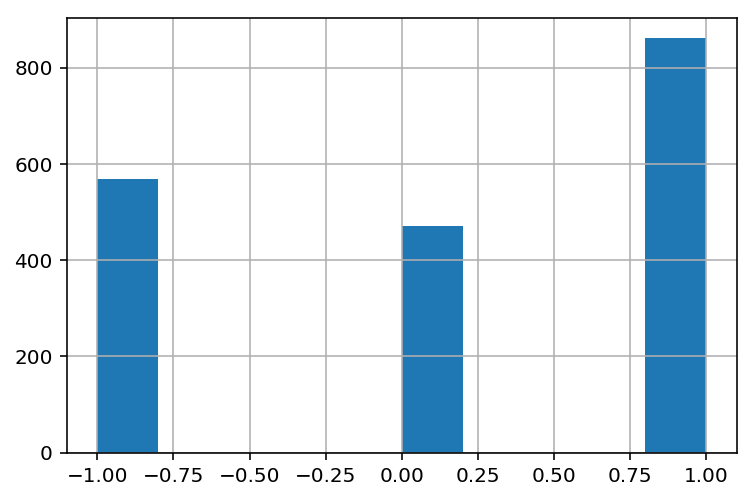

In [70]:
y.hist()
plt.show()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

## Random Forest Classifier

In [89]:
rfc = RandomForestClassifier(n_estimators=100, random_state=123, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_pred = y_pred_rfc
print()
print('Accuracy score: {:.3}'.format(rfc.score(X_test, y_test)))
print()
print('F1 score(macro): {:.3}'.format(f1_score(y_test, y_pred, average='macro')))
print('F1 score(micro): {:.3}'.format(f1_score(y_test, y_pred, average='micro')))
print('F1 score(weighted): {:.3}'.format(f1_score(y_test, y_pred, average='weighted')))
#print('F1 score(multiclass): {:.3}'.format(f1_score(y_test, y_pred, average='samples')))
print()
print('Precision score(macro)): {:.3}'.format(precision_score(y_test, y_pred, average='macro'))) 
print('Precision score(micro): {:.3}'.format(precision_score(y_test, y_pred, average='micro'))) 
print('Precision score(weighted): {:.3}'.format(precision_score(y_test, y_pred, average='weighted')))
#print('Precision score(multiclass): {:.3}'.format(precision_score(y_test, y_pred, average='samples')))
print()
print('recall score(macro)): {:.3}'.format(recall_score(y_test, y_pred, average='macro'))) 
print('recall score(micro): {:.3}'.format(recall_score(y_test, y_pred, average='micro'))) 
print('recall score(weighted): {:.3}'.format(recall_score(y_test, y_pred, average='weighted')))
#print('recall score(multiclass): {:.3}'.format(recall_score(y_test, y_pred, average='samples')))


Accuracy score: 0.724

F1 score(macro): 0.675
F1 score(micro): 0.724
F1 score(weighted): 0.709

Precision score(macro)): 0.685
Precision score(micro): 0.724
Precision score(weighted): 0.705

recall score(macro)): 0.678
recall score(micro): 0.724
recall score(weighted): 0.724


In [107]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = np.around(score(y_test, y_pred), decimals=3)

print('result_label: {} {}'.format(['W','D','L'], 'average'))
print('f1score: {} {:.3}'.format(fscore, np.mean(fscore)))
print('precision: {} {:.3}'.format(precision, np.mean(precision)))
print('recall: {} {:.3}'.format(recall, np.mean(precision)))
print('support: {} {:.5}'.format(support, np.mean(support)))

result_label: ['W', 'D', 'L'] average
f1score: [0.783 0.43  0.812] 0.675
precision: [0.76  0.531 0.764] 0.685
recall: [0.807 0.362 0.866] 0.685
support: [114.  94. 172.] 126.67
